230503 수요일 군AI 실습 자료입니다.   
본 내용은 IIPL (Intelligent Information Processing Lab) 소속 석사과정 유승욱 조교가 작성하였습니다.   
참고 자료: MIT Introduction to Deep Learning 6.S191: Lecture 3

> Lecture 3 
- Images are Numbers
- Fully Connected Neural Network for MNIST
- CNN for MNIST
- Make Predictions with the CNN Model

### Libraries

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

### Images are Numbers

In [ ]:
""" TODO: Print each shape of train, test dataset's image """

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('how many train images: {}'.format(len(train_images)))
print('how many test images: {}\n'.format(len(test_images)))

print('shapes of train images: {}'.format(train_images[0].shape))
print('shapes of test images: {}'.format(test_images[0].shape))

how many train images: 60000
how many test images: 10000

shapes of train images: (28, 28)
shapes of test images: (28, 28)


In [ ]:
print('actual value of train images: ')
print('{}'.format(train_images[0]))

actual value of train images: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

In [ ]:
""" TODO: Normalize images in train & test datasets """

# Normalize images
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

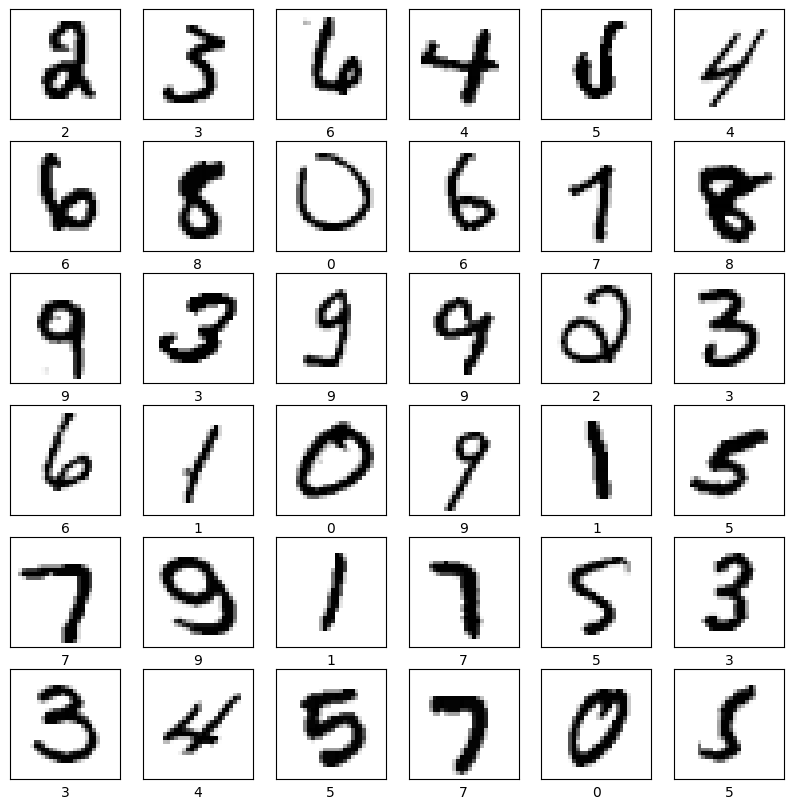

In [ ]:
# Visualize images
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

### Fully Connected Neural Network for MNIST

In [ ]:
""" TODO: Make your Fully Connected Neural Network using TensorFlow """ 

def build_fc_model(hidden_units):
  model = tf.keras.Sequential([
      # Flatten images
      tf.keras.layers.Flatten(),

      # First fully connected layer
      tf.keras.layers.Dense(hidden_units, activation=tf.nn.relu),

      # Last fully connected layer to output classification probability
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return model

In [ ]:
""" TODO: Compile your model """

# Define fully connected neural network model
hidden_units = 128
fc_model     = build_fc_model(hidden_units)

fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
""" TODO: Train your model """

# Train fully connected neural network model
batch_size = 64
epochs     = 10

fc_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 0.3708 - accuracy: 0.8949
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1990 - accuracy: 0.9428
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1501 - accuracy: 0.9573
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1210 - accuracy: 0.9657
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1013 - accuracy: 0.9715
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0876 - accuracy: 0.9748
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0767 - accuracy: 0.9779
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0680 - accuracy: 0.9807
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0609 - accuracy: 0.9828
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0553 - accuracy: 0.9843

In [ ]:
# Test fully connected neural network model
test_loss, test_acc = fc_model.evaluate(test_images, test_labels)

print('test loss: {}'.format(test_loss))
print('test accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9746
test loss: 0.08281411230564117
test accuracy: 0.9746000170707703


### Convolutional Neural Networks (CNN) for MNIST

In [ ]:
""" TODO: Make your CNN using TensorFlow """ 

def build_cnn_model(filters, hidden_units):
  model = tf.keras.Sequential([
      # First convolutional layer
      tf.keras.layers.Conv2D(filters=filters[0], kernel_size=(3,3), activation=tf.nn.relu),

      # First max pooling layer
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      # Second convolutional layer
      tf.keras.layers.Conv2D(filters=filters[1], kernel_size=(3,3), activation=tf.nn.relu),

      # Second max pooling layer
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      # Flatten images
      tf.keras.layers.Flatten(),

      # Additional fully connected layer
      tf.keras.layers.Dense(hidden_units, activation=tf.nn.relu),

      # Last fully connected layer to output classification probability
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return model

In [ ]:
""" TODO: Compile your model """

# Define CNN model
filters      = [24, 36]
hidden_units = 128
cnn_model    = build_cnn_model(filters, hidden_units)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
""" TODO: Train your model """

# Train CNN model
batch_size = 64
epochs     = 10

cnn_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
938/938 [==============================] - 43s 44ms/step - loss: 0.1826 - accuracy: 0.9470
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0558 - accuracy: 0.9830
Epoch 3/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0385 - accuracy: 0.9882
Epoch 4/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 5/10
938/938 [==============================] - 42s 44ms/step - loss: 0.0231 - accuracy: 0.9932
Epoch 6/10
938/938 [==============================] - 55s 59ms/step - loss: 0.0183 - accuracy: 0.9943
Epoch 7/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0147 - accuracy: 0.9953
Epoch 8/10
938/938 [==============================] - 42s 45ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 9/10
938/938 [==============================] - 42s 45ms/step - loss: 0.0100 - accuracy: 0.9966
Epoch 10/10
938/938 [==============================] - 40s 43ms/step - loss: 0.009

In [ ]:
# Test CNN model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('test loss: {}'.format(test_loss))
print('test accuracy: {}'.format(test_acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.0329 - accuracy: 0.9896
test loss: 0.03292785957455635
test accuracy: 0.9896000027656555


### Make Predictions with the CNN Model

In [ ]:
# Make predictions for all test images
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [ ]:
""" TODO: Select any index and check your result """

# Check result for specific image
selected_idx = 5
raw_prediction = predictions[selected_idx]
argmax_prediction = np.argmax(predictions[selected_idx])

print('raw predition: {}'.format(raw_prediction))
print('argmax prediction: {}'.format(argmax_prediction))

raw predition: [7.4690094e-09 9.9999994e-01 1.7195370e-11 6.2538336e-15 6.5907111e-09
 1.9120234e-09 2.9289757e-09 7.2402475e-09 2.2511733e-10 5.1557244e-12]
argmax prediction: 1


In [ ]:
# Selected image's label
label = test_labels[selected_idx]

print('label of its prediction: {}'.format(label))

label of its prediction: 1


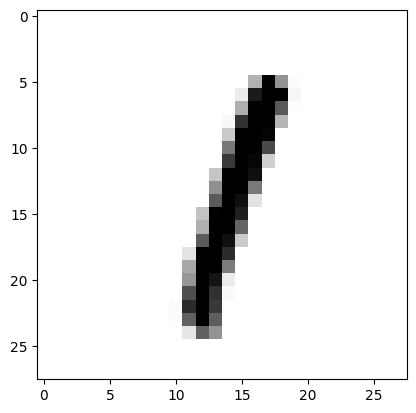

In [ ]:
# Visualize selected image
plt.imshow(test_images[selected_idx,:,:,0], cmap=plt.cm.binary)